In [1275]:
import matplotlib.pyplot as plt
import numpy as numpy
import pandas as pd
from sklearn.model_selection import train_test_split


In [1276]:
from sklearn.utils import shuffle

train_data = pd.read_csv('mean_variance.csv') # Load training data
test_data = pd.read_csv('mean_variance_test.csv') # Load test data
all_data = pd.concat([train_data,test_data])
print(all_data)



##normalise data / scaling / standard scaling 

                   file  r_arm_mean  ...  l_hip_variance  class
0   20211024_221837.mp4  145.936091  ...        6.381162      0
1   20211024_221843.mp4  146.998889  ...       36.845617      0
2   20211024_221849.mp4  132.311392  ...        6.705885      0
3   20211024_221854.mp4  129.495333  ...        3.407046      0
4   20211024_221859.mp4  144.987807  ...       27.398339      0
..                  ...         ...  ...             ...    ...
20           Good 4.mov   89.245071  ...      534.946483      1
21           Good 6.mov  233.412435  ...        7.091592      1
22           Good 7.mov  256.786654  ...        5.797683      1
23           Good 8.mov  245.501719  ...       92.369416      1
24           Good 9.mov  108.855380  ...      544.512392      1

[98 rows x 14 columns]


In [1277]:
# Use 

# Split into training data for X_train,X_test,y_train,y_test
# X_train = train_data.drop(['file','class'],1)
# y_train = train_data['class']

# X_test = test_data.drop(['file','class'],1)
# y_test = test_data['class']

# use train_test_split
#X_train,X_test,y_train,y_test = train_test_split(train_data.drop(['file','class'],1),train_data['class'],shuffle=True,test_size=0.1)
#print(X_train,X_test,y_train,y_test)

# Use 

# Split into training data for X_train,X_test,y_train,y_test
X_train = train_data.drop(['file','class'],1)
y_train = train_data['class']

X_test = test_data.drop(['file','class'],1)
y_test = test_data['class']


print (X_train)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
print (X_train)

# from sklearn import preprocessing

# X_train = preprocessing.normalize(X_train)
# X_test =  preprocessing.normalize(X_test)

# print (X_train)



# use train_test_split
# X_train,X_test,y_train,y_test = train_test_split(train_data.drop(['file','class'],1),train_data['class'],shuffle=True,test_size=0.1)
# print(X_train,X_test,y_train,y_test)

    r_arm_mean  r_arm_variance  ...  l_hip_mean  l_hip_variance
0   145.936091     1354.582741  ...  184.728636        6.381162
1   146.998889     1328.783288  ...  182.833810       36.845617
2   132.311392     1895.172804  ...  185.649747        6.705885
3   129.495333     2273.788320  ...  186.610533        3.407046
4   144.987807     1630.757389  ...  184.429298       27.398339
..         ...             ...  ...         ...             ...
68  224.989574     2237.189756  ...  165.840638       13.307019
69  233.788065     2531.207639  ...  167.938387       12.832817
70  110.878600     2225.233718  ...  176.655600        5.547552
71  109.989400     1871.953757  ...  177.027200        2.853641
72  111.800870     2737.795141  ...  176.936957        3.796777

[73 rows x 12 columns]
[[4.22586179e-01 2.63201087e-01 3.69554427e-01 4.06896689e-01
  5.27517442e-01 8.69809027e-01 3.96987449e-02 1.09515289e-01
  4.63982346e-01 7.12646604e-03 8.22379053e-01 6.35094644e-03]
 [4.28376568e-01 2.56

In [1278]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

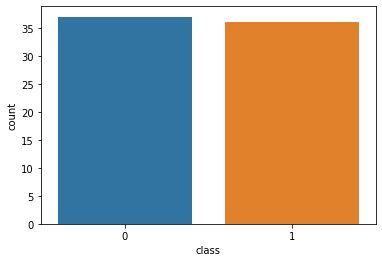

In [1279]:
sns.countplot(x='class',data=train_data)

In [1280]:
# Define a scaler to normalize input
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EPOCHS = 50
BATCH_SIZE = 4
LEARNING_RATE = 0.001

In [1281]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test))

In [1282]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True,drop_last=True)
test_loader = DataLoader(dataset=test_data, batch_size=1,drop_last=True)

In [1283]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 12., 6 * 2 angles of 
        self.layer_1 = nn.Linear(12, 64) 
        self.layer_2 = nn.Linear(64, 32)
        self.layer_out = nn.Linear(32, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1) # prevents overfit, play with this also, up to 0.5
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(32) ##
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        # x = self.batchnorm1(x) ## test this after seed
        x = self.relu(self.layer_2(x))
        # x = self.batchnorm2(x) ## test this after seed #small dataset
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [1284]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [1285]:
model = BinaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss() #
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


BinaryClassification(
  (layer_1): Linear(in_features=12, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [1286]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [1287]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.70152 | Acc: 51.389
Epoch 002: | Loss: 0.66565 | Acc: 54.167
Epoch 003: | Loss: 0.63521 | Acc: 68.056
Epoch 004: | Loss: 0.59752 | Acc: 76.389
Epoch 005: | Loss: 0.57044 | Acc: 77.778
Epoch 006: | Loss: 0.52315 | Acc: 79.167
Epoch 007: | Loss: 0.50348 | Acc: 77.778
Epoch 008: | Loss: 0.46174 | Acc: 81.944
Epoch 009: | Loss: 0.43285 | Acc: 80.556
Epoch 010: | Loss: 0.39993 | Acc: 84.722
Epoch 011: | Loss: 0.40456 | Acc: 80.556
Epoch 012: | Loss: 0.37348 | Acc: 81.944
Epoch 013: | Loss: 0.35513 | Acc: 81.944
Epoch 014: | Loss: 0.34962 | Acc: 83.333
Epoch 015: | Loss: 0.32997 | Acc: 83.333
Epoch 016: | Loss: 0.31381 | Acc: 86.111
Epoch 017: | Loss: 0.30213 | Acc: 87.500
Epoch 018: | Loss: 0.28984 | Acc: 87.500
Epoch 019: | Loss: 0.27862 | Acc: 88.889
Epoch 020: | Loss: 0.25961 | Acc: 91.667
Epoch 021: | Loss: 0.24717 | Acc: 90.278
Epoch 022: | Loss: 0.23008 | Acc: 93.056
Epoch 023: | Loss: 0.23515 | Acc: 90.278
Epoch 024: | Loss: 0.21449 | Acc: 94.444
Epoch 025: | Los

In [1288]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred) ##
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [1289]:
print(confusion_matrix(y_test, y_pred_list))
print(y_test)
print(y_pred_list)
print(classification_report(y_test, y_pred_list))

[[13  3]
 [ 4  5]]
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
Name: class, dtype: int64
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.62      0.56      0.59         9

    accuracy                           0.72        25
   macro avg       0.69      0.68      0.69        25
weighted avg       0.71      0.72      0.72        25



random seed

check pytorch set random seed

batch norm - yes or no, 1 or 2